In [1]:
import pandas as pd

# Read the CSV file
file_path = '../preped.csv'
df = pd.read_csv(file_path)

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Select the features and target variable
features = df[['Is Series', 'Hidden Gem Score', 'Runtime', 'Minimum Age', 'Awards Received', 'Awards Nominated For', 'Boxoffice', 'Release Date', 'IMDb Votes', 'Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'History', 'Horror', 'Music', 'Musical', 'Mystery', 'News', 'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War', 'Western']]
target = df['IMDb Score']

# Drop rows with missing values in features or target
features = features.dropna()
target = target[features.index]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.3f}')
print(f'R-squared: {r2:.3f}')

Mean Squared Error: 0.459
R-squared: 0.468


In [3]:
# Define the target columns for Metacritic Score and Rotten Tomatoes Score
target_column_mc = 'Metacritic Score'
target_column_rt = 'Rotten Tomatoes Score'

# Separate the features and target variables for Metacritic Score
X_mc = features
y_mc = df[target_column_mc]

# Separate the features and target variables for Rotten Tomatoes Score
X_rt = features
y_rt = df[target_column_rt]

# Split the data into training and testing sets for Metacritic Score
X_train_mc, X_test_mc, y_train_mc, y_test_mc = train_test_split(X_mc, y_mc, test_size=0.2, random_state=42)

# Split the data into training and testing sets for Rotten Tomatoes Score
X_train_rt, X_test_rt, y_train_rt, y_test_rt = train_test_split(X_rt, y_rt, test_size=0.2, random_state=42)

# Create and train the regression model for Metacritic Score
model_mc = LinearRegression()
model_mc.fit(X_train_mc, y_train_mc)

# Create and train the regression model for Rotten Tomatoes Score
model_rt = LinearRegression()
model_rt.fit(X_train_rt, y_train_rt)

# Make predictions on the test set for Metacritic Score
y_pred_mc = model_mc.predict(X_test_mc)

# Make predictions on the test set for Rotten Tomatoes Score
y_pred_rt = model_rt.predict(X_test_rt)

# Evaluate the model for Metacritic Score
mse_mc = mean_squared_error(y_test_mc, y_pred_mc)
r2_mc = r2_score(y_test_mc, y_pred_mc)

# Evaluate the model for Rotten Tomatoes Score
mse_rt = mean_squared_error(y_test_rt, y_pred_rt)
r2_rt = r2_score(y_test_rt, y_pred_rt)

print(f'Mean Squared Error for Rotten Tomatoes Score: {mse_rt:.3f}')
print(f'R-squared for Rotten Tomatoes Score: {r2_rt:.3f}')
print("\n")
print(f'Mean Squared Error for Metacritic Score: {mse_mc:.3f}')
print(f'R-squared for Metacritic Score: {r2_mc:.3f}')

Mean Squared Error for Rotten Tomatoes Score: 304.420
R-squared for Rotten Tomatoes Score: 0.564


Mean Squared Error for Metacritic Score: 133.196
R-squared for Metacritic Score: 0.560


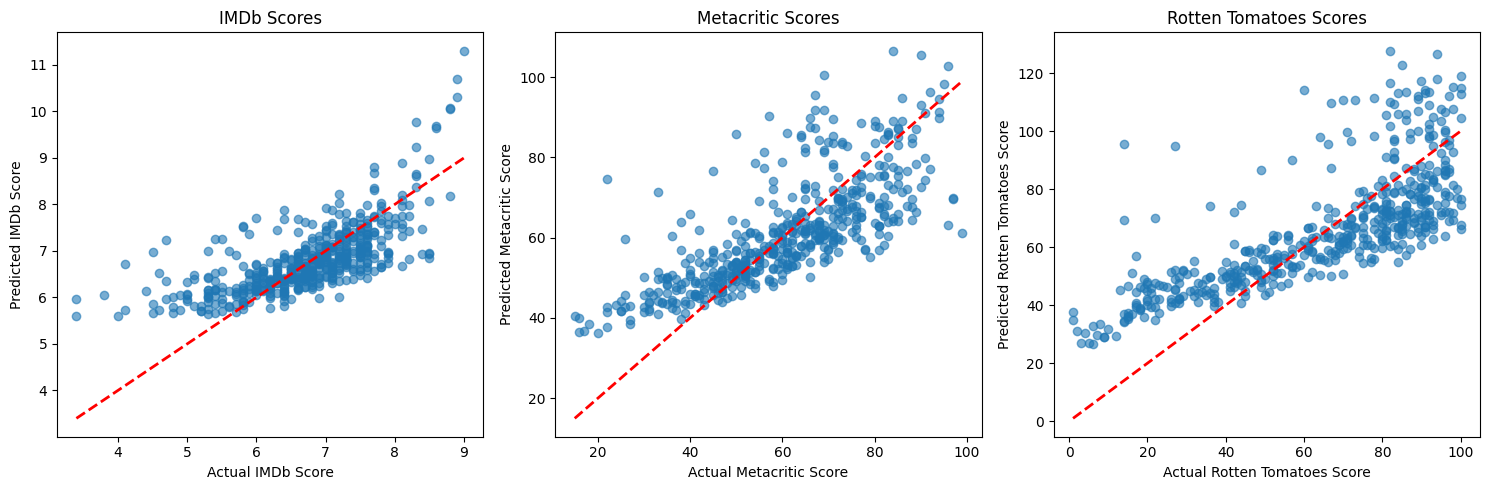

In [4]:
import matplotlib.pyplot as plt

# Create a figure with subplots
plt.figure(figsize=(15, 5))

# Plot IMDb scores
plt.subplot(131)
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual IMDb Score')
plt.ylabel('Predicted IMDb Score')
plt.title('IMDb Scores')

# Plot Metacritic scores 
plt.subplot(132)
plt.scatter(y_test_mc, y_pred_mc, alpha=0.6)
plt.plot([y_test_mc.min(), y_test_mc.max()], [y_test_mc.min(), y_test_mc.max()], 'r--', lw=2)
plt.xlabel('Actual Metacritic Score')
plt.ylabel('Predicted Metacritic Score')
plt.title('Metacritic Scores')

# Plot Rotten Tomatoes scores
plt.subplot(133)
plt.scatter(y_test_rt, y_pred_rt, alpha=0.6)
plt.plot([y_test_rt.min(), y_test_rt.max()], [y_test_rt.min(), y_test_rt.max()], 'r--', lw=2)
plt.xlabel('Actual Rotten Tomatoes Score') 
plt.ylabel('Predicted Rotten Tomatoes Score')
plt.title('Rotten Tomatoes Scores')

plt.tight_layout()
plt.show()

In [5]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV

# Define the parameter grid for HalvingGridSearchCV
param_grid = {
    'fit_intercept': [True, False],
    'copy_X': [True, False],
    'positive': [True, False],
    'n_jobs': [1, 2, 4, 8],
}

# Define the target columns
target_im = 'IMDb Score'
target_rt = 'Rotten Tomatoes Score'
target_mc = 'Metacritic Score'

targets = {
    target_im: {},
    target_rt: {},
    target_mc: {}
}

for target_name, target_data in targets.items():
    y = df[target_name]
    X_train, X_test, y_train, y_test = train_test_split(features, y, test_size=0.2, random_state=42)

    # Scale features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    targets[target_name]['X_train_scaled'] = X_train_scaled
    targets[target_name]['X_test_scaled'] = X_test_scaled
    targets[target_name]['y_train'] = y_train
    targets[target_name]['y_test'] = y_test
    targets[target_name]['scaler'] = scaler

    # Perform HalvingGridSearchCV
    model = LinearRegression()
    halving_search = HalvingGridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=0, n_jobs=-1, factor=2, min_resources=50)
    halving_search.fit(X_train_scaled, y_train)
    best_model = halving_search.best_estimator_

    # Make predictions using the best model
    y_pred = best_model.predict(X_test_scaled)

    r2 = r2_score(y_test, y_pred)

    # Print results
    print(f'Best Parameters for {target_name}: {halving_search.best_params_}')
    print(f'R^2 Score for {target_name}: {r2:.3f}')
    
    targets[target_name]['best_model'] = best_model
    targets[target_name]['halving_search'] = halving_search


Best Parameters for IMDb Score: {'copy_X': False, 'fit_intercept': True, 'n_jobs': 2, 'positive': True}
R^2 Score for IMDb Score: 0.472
Best Parameters for Rotten Tomatoes Score: {'copy_X': False, 'fit_intercept': True, 'n_jobs': 4, 'positive': True}
R^2 Score for Rotten Tomatoes Score: 0.566
Best Parameters for Metacritic Score: {'copy_X': False, 'fit_intercept': True, 'n_jobs': 2, 'positive': False}
R^2 Score for Metacritic Score: 0.560


Best Parameters for IMDb Score: {'copy_X': False, 'fit_intercept': True, 'n_jobs': 2, 'positive': True}\
R^2 Score for IMDb Score: 0.472\
Best Parameters for Rotten Tomatoes Score: {'copy_X': False, 'fit_intercept': True, 'n_jobs': 4, 'positive': True}\
R^2 Score for Rotten Tomatoes Score: 0.566\
Best Parameters for Metacritic Score: {'copy_X': False, 'fit_intercept': True, 'n_jobs': 2, 'positive': False}\
R^2 Score for Metacritic Score: 0.560

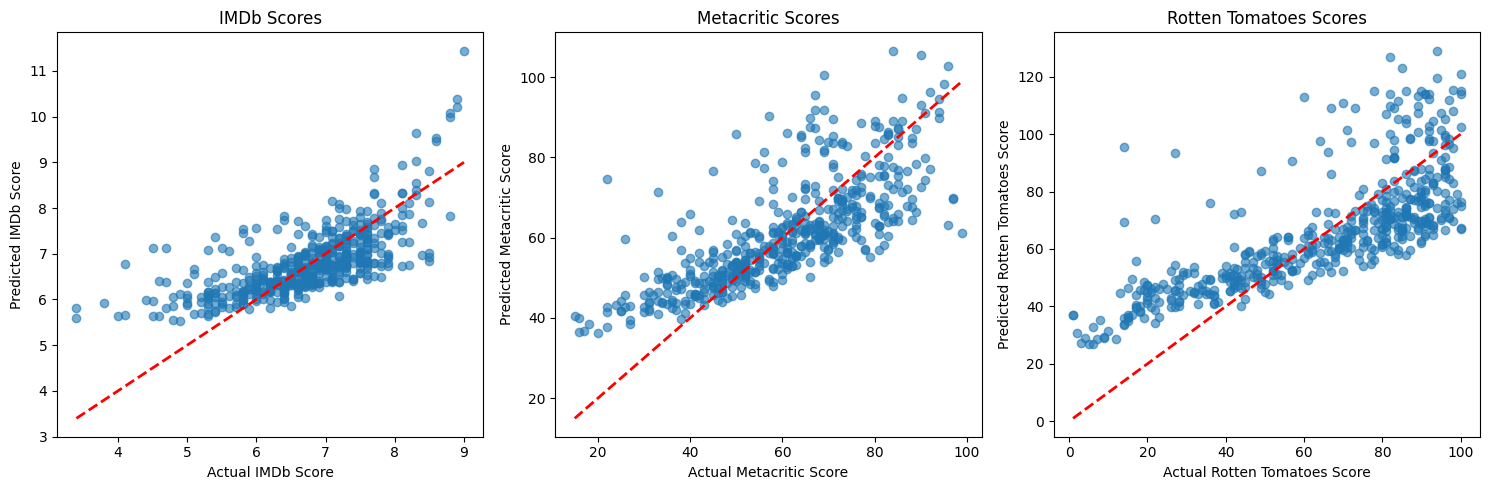

In [7]:
import matplotlib.pyplot as plt

imdb_best = targets[target_im]['best_model']
rt_best = targets[target_rt]['best_model']
mc_best = targets[target_mc]['best_model']

# Create a figure with subplots
plt.figure(figsize=(15, 5))

# Plot IMDb scores
plt.subplot(131)
plt.scatter(targets[target_im]['y_test'], imdb_best.predict(targets[target_im]['X_test_scaled']), alpha=0.6)
plt.plot([targets[target_im]['y_test'].min(), targets[target_im]['y_test'].max()], [targets[target_im]['y_test'].min(), targets[target_im]['y_test'].max()], 'r--', lw=2)
plt.xlabel('Actual IMDb Score')
plt.ylabel('Predicted IMDb Score')
plt.title('IMDb Scores')

# Plot Metacritic scores 
plt.subplot(132)
plt.scatter(targets[target_mc]['y_test'], mc_best.predict(targets[target_mc]['X_test_scaled']), alpha=0.6)
plt.plot([targets[target_mc]['y_test'].min(), targets[target_mc]['y_test'].max()], [targets[target_mc]['y_test'].min(), targets[target_mc]['y_test'].max()], 'r--', lw=2)
plt.xlabel('Actual Metacritic Score')
plt.ylabel('Predicted Metacritic Score')
plt.title('Metacritic Scores')

# Plot Rotten Tomatoes scores
plt.subplot(133)
plt.scatter(targets[target_rt]['y_test'], rt_best.predict(targets[target_rt]['X_test_scaled']), alpha=0.6)
plt.plot([targets[target_rt]['y_test'].min(), targets[target_rt]['y_test'].max()], [targets[target_rt]['y_test'].min(), targets[target_rt]['y_test'].max()], 'r--', lw=2)
plt.xlabel('Actual Rotten Tomatoes Score') 
plt.ylabel('Predicted Rotten Tomatoes Score')
plt.title('Rotten Tomatoes Scores')

plt.tight_layout()
plt.show()